<a href="https://colab.research.google.com/github/jnabasinga/hello_world/blob/master/Class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [6]:
# prompt: code for uploading a csv file from  local device

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving commodities.csv to commodities.csv
User uploaded file "commodities.csv" with length 31002 bytes


In [8]:
# prompt: load the dataset

import io
df = pd.read_csv(io.BytesIO(uploaded['commodities.csv'])) # Change filename.csv to your uploaded file name
df.head()

,#,date,oil_dubai,coffee_arabica,coffee_robustas
0,1,01/01/1960,1.63,0.9409,0.696864
1,2,01/02/1960,1.63,0.9469,0.688707
2,3,01/03/1960,1.63,0.9281,0.688707
3,4,01/04/1960,1.63,0.9303,0.684519
4,5,01/05/1960,1.63,0.9200,0.690692


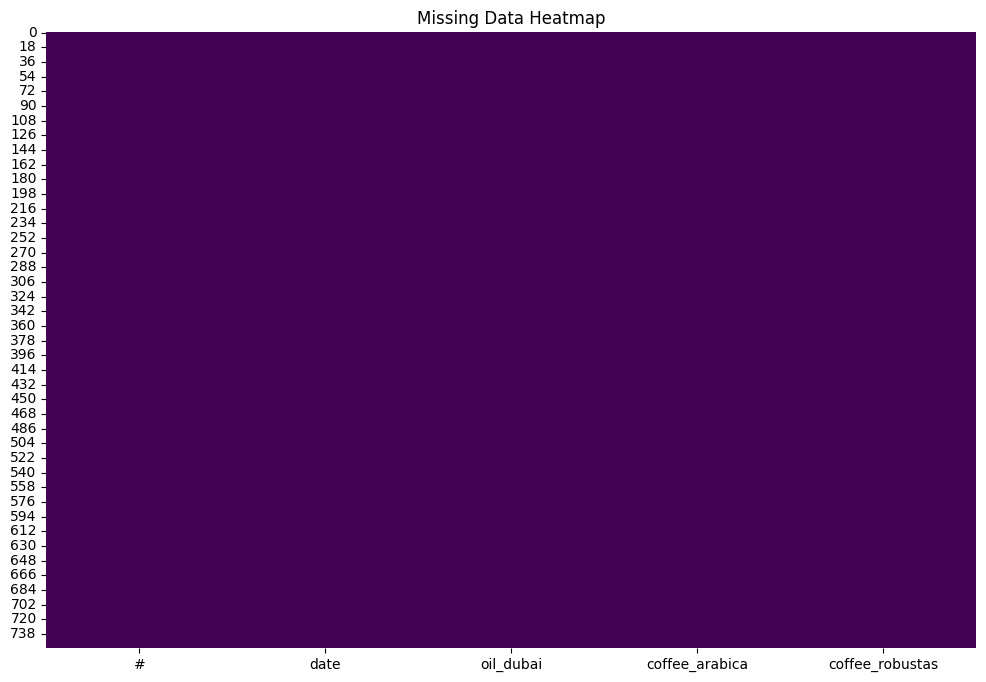

In [9]:
# prompt: detect missing data using heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

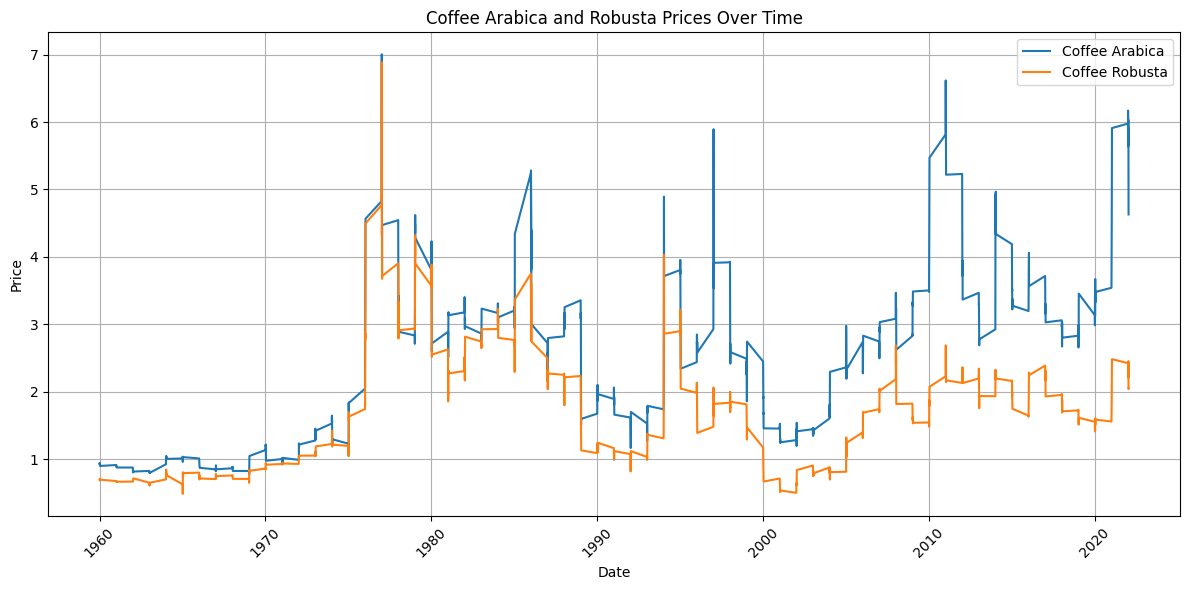

In [10]:
# prompt: plot date vs coffee_arabica and coffee_robustas

# Assuming your DataFrame is named 'df' and has columns 'date', 'coffee_arabica', and 'coffee_robusta'
# Convert 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_arabica'], label='Coffee Arabica')
plt.plot(df['date'], df['coffee_robustas'], label='Coffee Robusta')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Coffee Arabica and Robusta Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

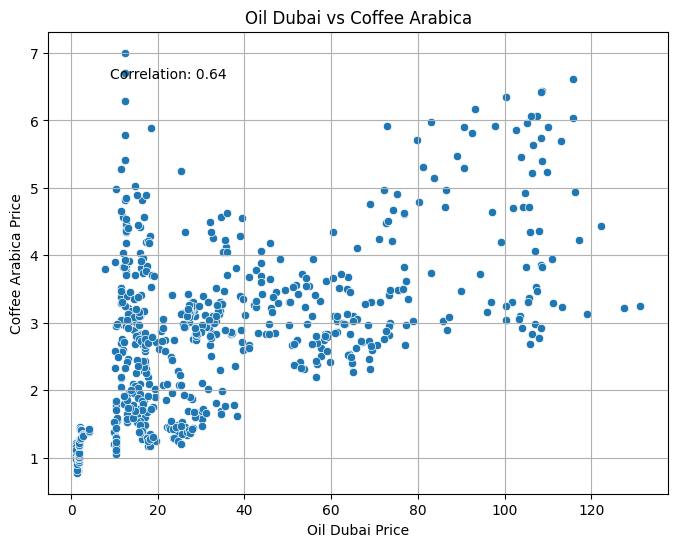

In [15]:
# prompt: plot oil_dubai vs coffee_arabica and plot the relationship and correlation between them

# Calculate the correlation between oil_dubai and coffee_arabica
correlation = df['oil_dubai'].corr(df['coffee_arabica'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_dubai', y='coffee_arabica', data=df)
plt.title('Oil Dubai vs Coffee Arabica')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Arabica Price')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

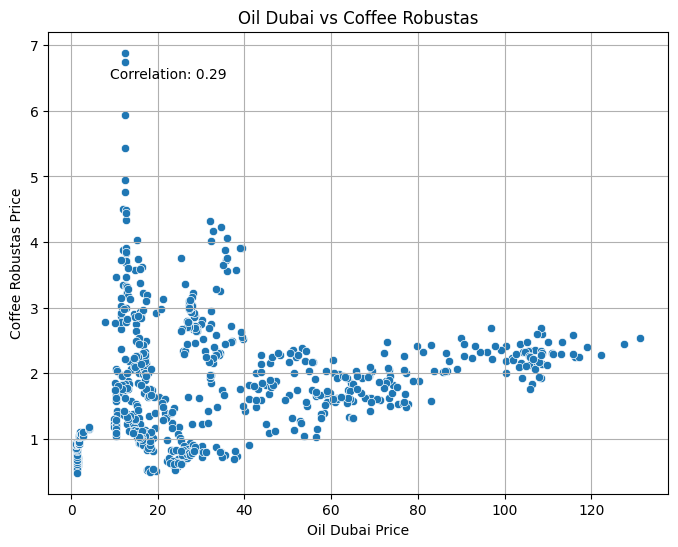

In [17]:
# prompt: plot oil_dubai vs coffee_robustas and plot the relationship and correlation between them

# Calculate the correlation between oil_dubai and coffee_robustas
correlation = df['oil_dubai'].corr(df['coffee_robustas'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_dubai', y='coffee_robustas', data=df)
plt.title('Oil Dubai vs Coffee Robustas')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Robustas Price')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()

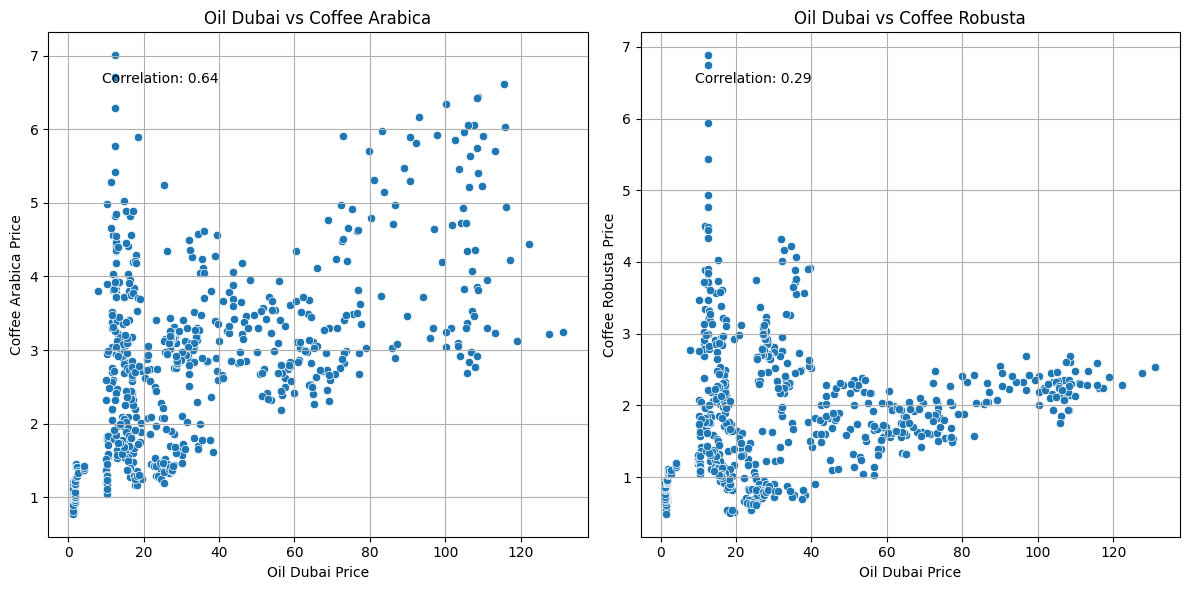

Correlation between Oil Dubai and Coffee Arabica: 0.64
Correlation between Oil Dubai and Coffee Robusta: 0.29


In [18]:
# prompt: show the relationship between coffee_arabica and coffee_robustas Vs oil_dubai and explain the it

# Calculate the correlation between oil_dubai and coffee_arabica
correlation_arabica = df['oil_dubai'].corr(df['coffee_arabica'])

# Calculate the correlation between oil_dubai and coffee_robustas
correlation_robusta = df['oil_dubai'].corr(df['coffee_robustas'])

# Create a scatter plot to visualize the relationship for both coffee types
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='oil_dubai', y='coffee_arabica', data=df)
plt.title('Oil Dubai vs Coffee Arabica')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Arabica Price')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation: {correlation_arabica:.2f}', transform=plt.gca().transAxes)

plt.subplot(1, 2, 2)
sns.scatterplot(x='oil_dubai', y='coffee_robustas', data=df)
plt.title('Oil Dubai vs Coffee Robusta')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Robusta Price')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation: {correlation_robusta:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


print(f"Correlation between Oil Dubai and Coffee Arabica: {correlation_arabica:.2f}")
print(f"Correlation between Oil Dubai and Coffee Robusta: {correlation_robusta:.2f}")


In [ ]:
# prompt: help me understand further the relationship between coffee_arabica and oil_dubai and coffee_robustas and oil_dubai

Okay, let's break down the relationship between coffee (Arabica and Robusta) and oil_dubai based on the provided code.

**Core Idea:**

The code aims to understand how the prices of coffee Arabica, coffee Robusta, and oil in Dubai are related. It does this by calculating the correlation between the prices of oil and each type of coffee.

**Understanding the Correlation:**

- **Correlation:** The correlation coefficient measures the strength and direction of the linear relationship between two variables.
    - A positive correlation (close to 1) means that when one variable goes up, the other tends to go up as well.
    - A negative correlation (close to -1) means that when one variable goes up, the other tends to go down.
    - A correlation close to 0 indicates a weak or no linear relationship.

**Analysis Based on the Code:**

1. **`correlation_arabica`:** This calculates the correlation between `oil_dubai` and `coffee_arabica`.  The code then produces a scatter plot visualizing this relationship.

2. **`correlation_robusta`:** Similarly, this calculates the correlation between `oil_dubai` and `coffee_robustas`. It then creates a scatter plot for this relationship as well.

3. **Comparing the Correlations:** By comparing `correlation_arabica` and `correlation_robusta`, you can understand:
   - **How strong the relationship is:** If both correlations are close to 0, it suggests a weak or no linear relationship between oil prices and coffee prices. If either correlation is close to 1 or -1, it indicates a stronger relationship.
   - **If the relationship is similar:** If the correlations have similar values (both positive or both negative), it means that oil price movements tend to affect both Arabica and Robusta coffee prices similarly. If they have different signs or values, it suggests that oil might affect each type of coffee differently.


**Interpreting the Results (You'll need to run the code to get the actual correlation values):**

- **If `correlation_arabica` and `correlation_robusta` are both positive and relatively high:** This means that there's a tendency for both Arabica and Robusta coffee prices to increase when Dubai oil prices increase. This could be due to shared factors, like global economic conditions, transportation costs, or general commodity price inflation.
- **If one correlation is positive and the other negative:** This indicates that oil price changes have opposite effects on Arabica and Robusta coffee prices. This could be due to differences in production costs, demand dynamics, or supply chain factors affecting each type of coffee differently.
- **If both correlations are close to 0:** This suggests that there's no strong linear relationship between oil prices and the prices of both types of coffee.


**To Further Understand the Relationship:**

- **Look at the scatter plots:** The plots provide a visual representation of the correlation. Observe if there's a clear trend in the data points.
- **Consider economic factors:** Investigate potential reasons why oil and coffee prices might be correlated. This might involve research into supply chain disruptions, political instability, currency exchange rates, and other market influences.

I hope this helps clarify the code's purpose and how to interpret the relationship between oil_dubai, coffee_arabica, and coffee_robustas!

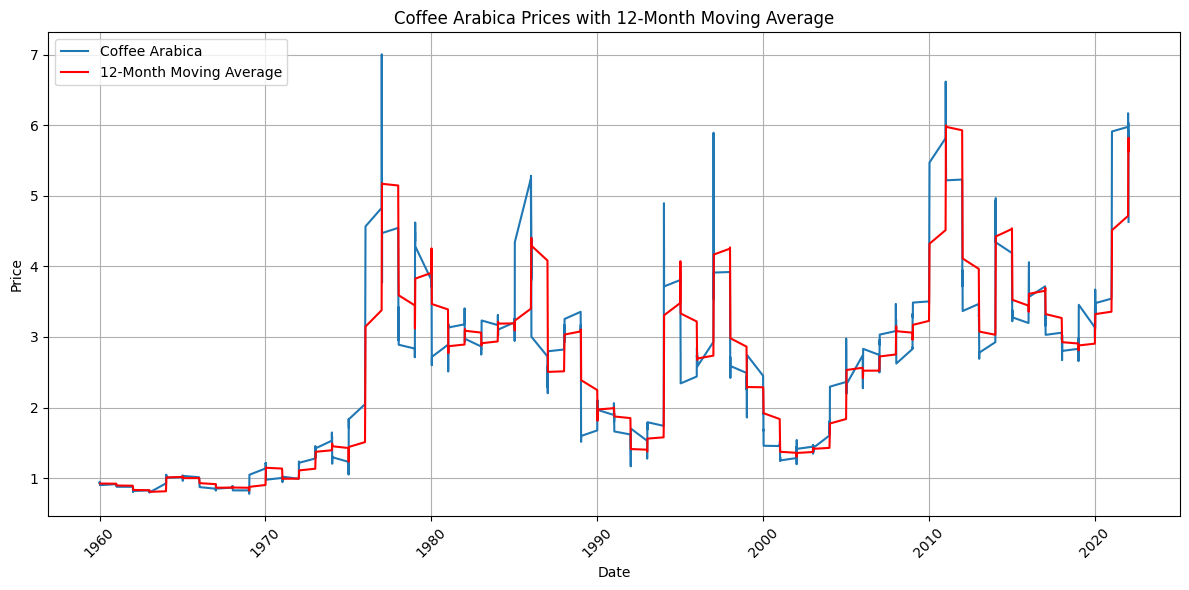

In [27]:
# prompt: Calculate 12-months moving averages for coffee_arabica to smooth out short-term fluctuations and better identify underlying trends.

# Calculate the 12-month moving average for coffee_arabica
df['coffee_arabica_ma12'] = df['coffee_arabica'].rolling(window=12).mean()

# Plot the original coffee_arabica prices and the 12-month moving average
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_arabica'], label='Coffee Arabica')
plt.plot(df['date'], df['coffee_arabica_ma12'], label='12-Month Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Coffee Arabica Prices with 12-Month Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

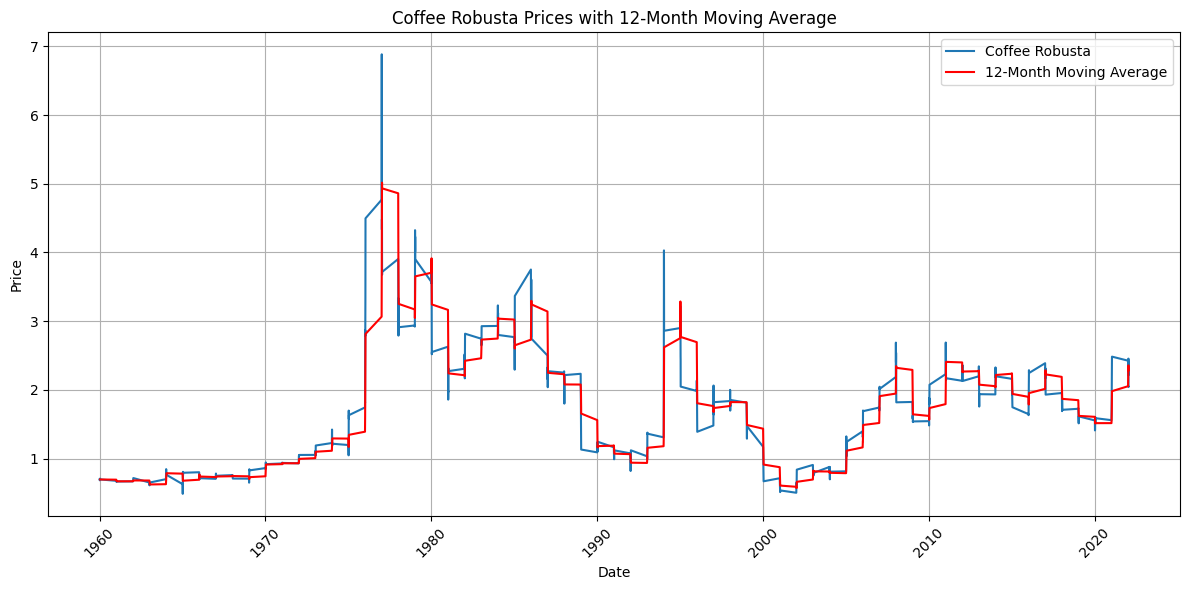

In [28]:
# prompt: Calculate 12-months moving averages for coffee_robustas to smooth out short-term fluctuations and better identify underlying trends.

# Calculate the 12-month moving average for coffee_robustas
df['coffee_robustas_ma12'] = df['coffee_robustas'].rolling(window=12).mean()

# Plot the original coffee_robustas prices and the 12-month moving average
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_robustas'], label='Coffee Robusta')
plt.plot(df['date'], df['coffee_robustas_ma12'], label='12-Month Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Coffee Robusta Prices with 12-Month Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

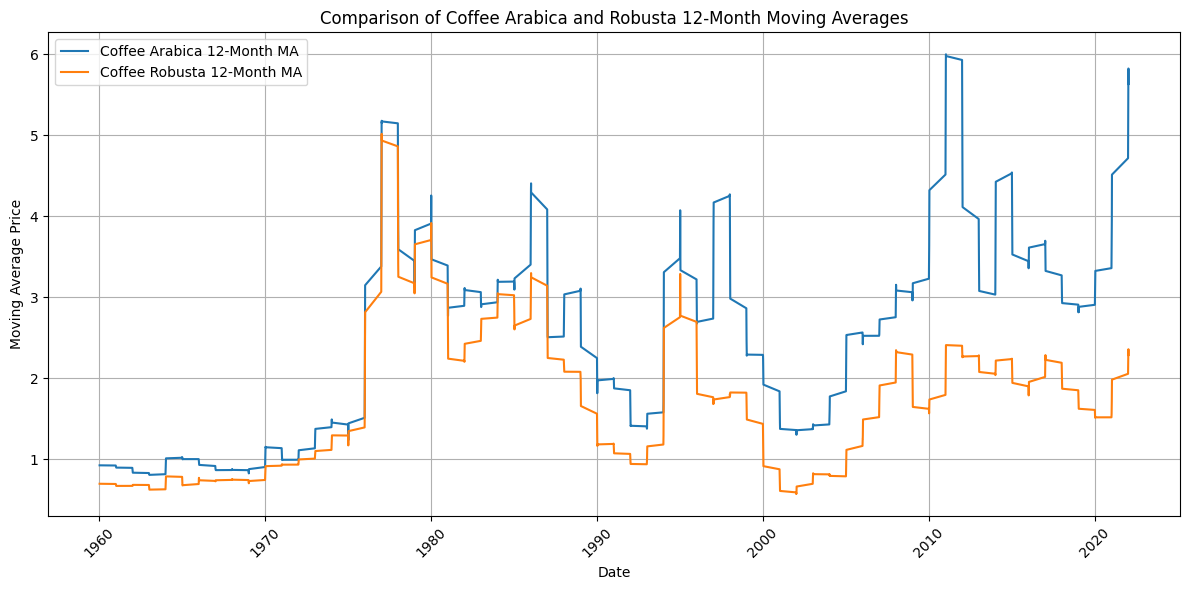

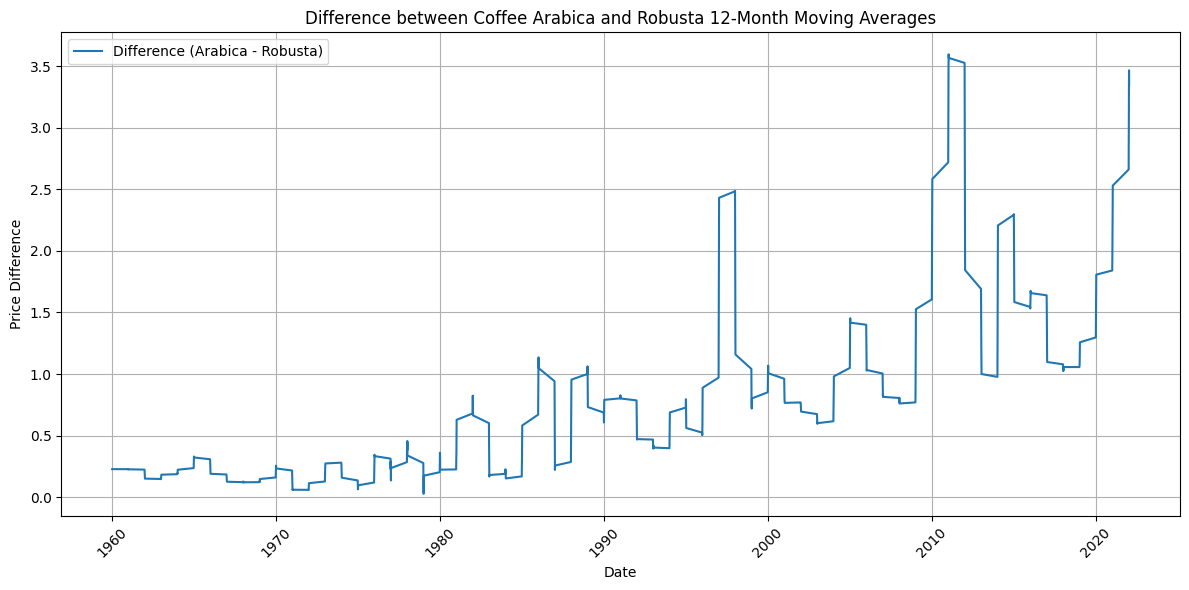

In [29]:
# prompt: compare the results of the coffee_arabica moving averages and coffee_robustas moving average

# Assuming df has 'coffee_arabica_ma12' and 'coffee_robustas_ma12' columns
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_arabica_ma12'], label='Coffee Arabica 12-Month MA')
plt.plot(df['date'], df['coffee_robustas_ma12'], label='Coffee Robusta 12-Month MA')
plt.xlabel('Date')
plt.ylabel('Moving Average Price')
plt.title('Comparison of Coffee Arabica and Robusta 12-Month Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the difference between the two moving averages
df['ma_difference'] = df['coffee_arabica_ma12'] - df['coffee_robustas_ma12']

# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['ma_difference'], label='Difference (Arabica - Robusta)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Difference between Coffee Arabica and Robusta 12-Month Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: help to explain the results of these moving averages

Okay, let's break down the results of the moving averages calculated and plotted in your code.

**What are Moving Averages?**

Moving averages are used to smooth out price fluctuations and identify trends in data over a period of time. A 12-month moving average, for example, calculates the average price over the past 12 months, and this average is recalculated as new data points become available.

**Interpretation of the Results:**

1. **Individual Moving Averages:**
   - The plots showing the original Coffee Arabica/Robusta prices along with their respective 12-month moving averages highlight how the moving average smooths out the price variations.
   - The moving average generally follows the overall trend of the price. If the price is trending upwards, the moving average will generally be trending upwards as well, but with less volatility.
   - During periods of significant price fluctuations (volatility), the moving average helps in identifying if the trend is still intact.

2. **Comparison of Moving Averages:**
   - The plot comparing the 12-month moving averages of Coffee Arabica and Robusta reveals the relative price movements between the two commodities.
   - **If the Arabica MA is consistently above the Robusta MA,** it indicates that Arabica prices have been generally higher than Robusta prices during the period analyzed.
   - **If the lines cross each other,** it suggests shifts in the relative price relationship between the two commodities.

3. **Difference between Moving Averages:**
   - The plot of the difference between the two moving averages (Arabica - Robusta) is helpful for understanding the spread between the two commodities.
   - **A positive difference** indicates that Arabica prices are higher than Robusta prices on average over the past 12 months.
   - **A negative difference** suggests that Robusta prices are higher than Arabica prices on average.
   - **Large swings in the difference** may reveal times when the price relationship between the two commodities is changing significantly.

**Insights from the Analysis:**

- You can observe the general trend of Coffee Arabica and Robusta prices over time.
- You can identify potential shifts in the relative price relationship between the two coffee types.
- You can find periods when the difference between the two prices is widening or narrowing.
- The moving average analysis can provide a better understanding of the underlying trends, smoothing out the short-term fluctuations and providing insights into longer-term price movements.


**In your specific example, you can see the moving average providing a more stable view of the prices of both Arabica and Robusta coffee, compared to the more volatile original prices.**

This type of analysis is essential in understanding the market behavior and making more informed decisions based on broader trends rather than daily price fluctuations.

0            NaN
1       0.637687
2      -1.985426
3       0.237043
4      -1.107170
         ...    
751     4.941554
752    -0.350184
753   -10.247112
754   -10.908864
755    -1.823367
Name: coffee_arabica_pct_change, Length: 756, dtype: float64


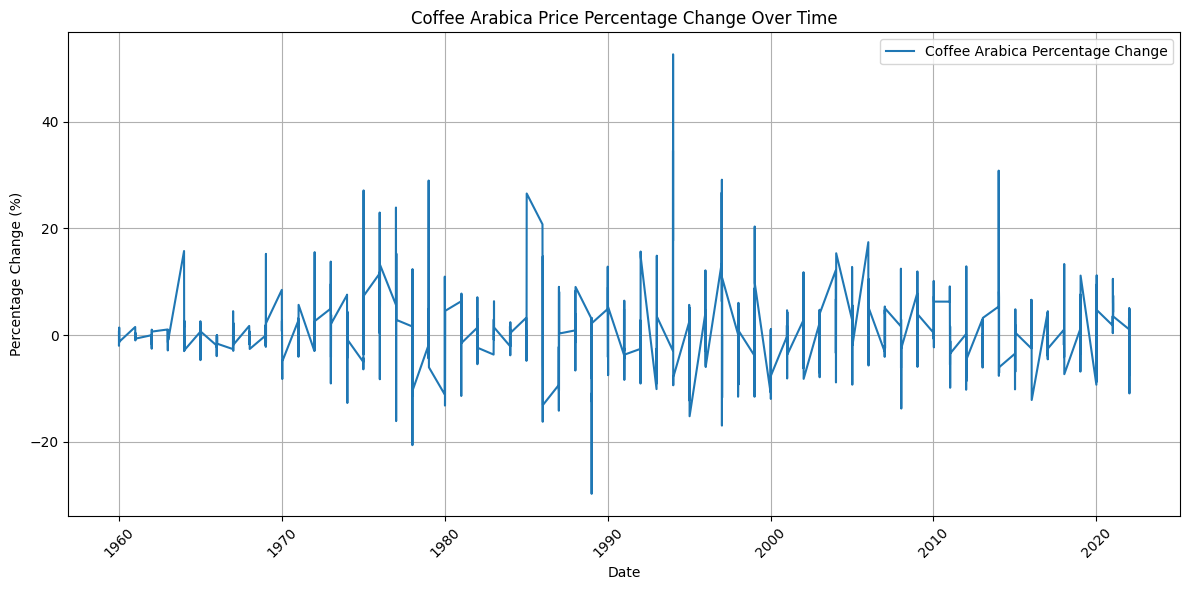

In [32]:
# prompt: Calculate the percentage change in coffee_arabica

# Calculate the percentage change in coffee_arabica
df['coffee_arabica_pct_change'] = df['coffee_arabica'].pct_change() * 100

# Print the percentage change
print(df['coffee_arabica_pct_change'])

# Plot the percentage change
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_arabica_pct_change'], label='Coffee Arabica Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Coffee Arabica Price Percentage Change Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0            NaN
1      -1.170515
2       0.000000
3      -0.608197
4       0.901772
         ...    
751     9.278453
752     1.559508
753    -7.498204
754   -10.115523
755     0.205206
Name: coffee_robustas_pct_change, Length: 756, dtype: float64


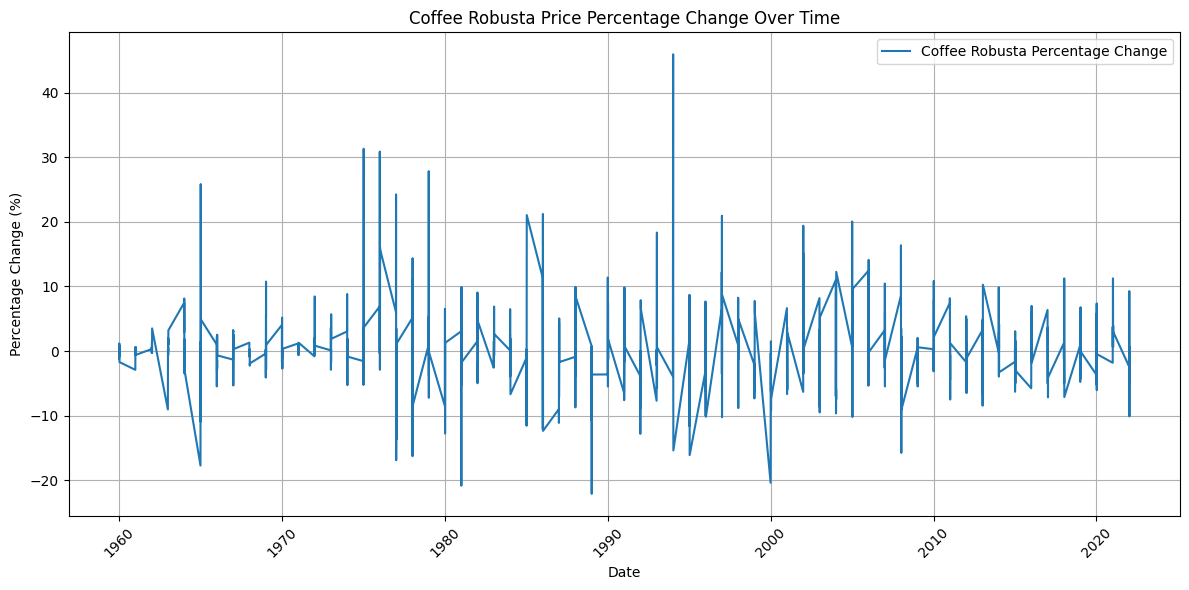

In [33]:
# prompt: Calculate the percentage change in coffee_robustas

# Calculate the percentage change in coffee_robustas
df['coffee_robustas_pct_change'] = df['coffee_robustas'].pct_change() * 100

# Print the percentage change
print(df['coffee_robustas_pct_change'])

# Plot the percentage change
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['coffee_robustas_pct_change'], label='Coffee Robusta Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Coffee Robusta Price Percentage Change Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
751    -8.198723
752    -7.283887
753    -0.044135
754    -4.757700
755   -11.010663
Name: oil_dubai_pct_change, Length: 756, dtype: float64


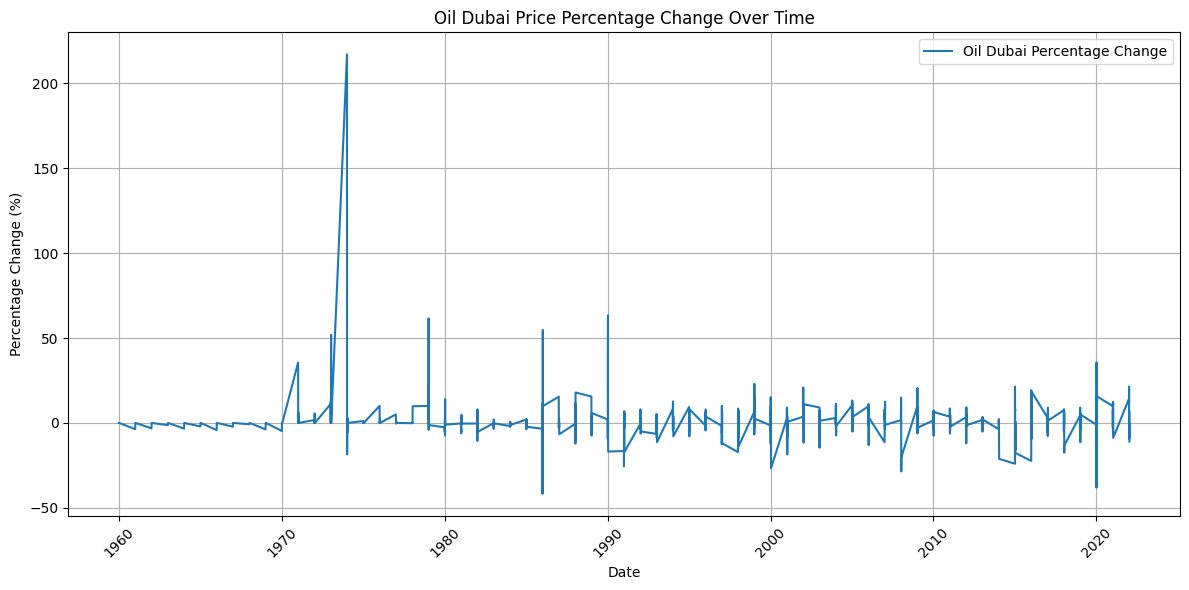

In [34]:
# prompt: Calculate the percentage change in oil_dubai

# Calculate the percentage change in oil_dubai
df['oil_dubai_pct_change'] = df['oil_dubai'].pct_change() * 100

# Print the percentage change
print(df['oil_dubai_pct_change'])

# Plot the percentage change
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['oil_dubai_pct_change'], label='Oil Dubai Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Oil Dubai Price Percentage Change Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

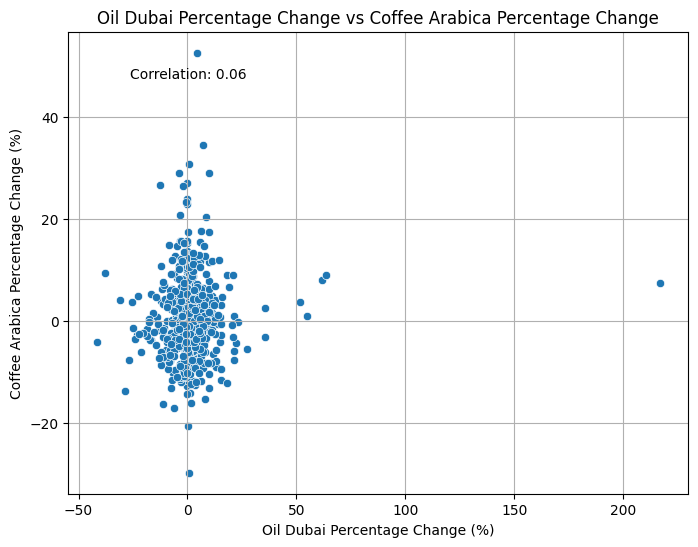

Correlation between Oil Dubai Percentage Change and Coffee Arabica Percentage Change: 0.06


In [35]:
# prompt: Calculate and plot the correlation between coffee_arabica percentage changes and oil_dubai percentage changes

# Calculate the correlation between coffee_arabica percentage changes and oil_dubai percentage changes
correlation_arabica_oil = df['coffee_arabica_pct_change'].corr(df['oil_dubai_pct_change'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_dubai_pct_change', y='coffee_arabica_pct_change', data=df)
plt.title('Oil Dubai Percentage Change vs Coffee Arabica Percentage Change')
plt.xlabel('Oil Dubai Percentage Change (%)')
plt.ylabel('Coffee Arabica Percentage Change (%)')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation: {correlation_arabica_oil:.2f}', transform=plt.gca().transAxes)

plt.show()

print(f"Correlation between Oil Dubai Percentage Change and Coffee Arabica Percentage Change: {correlation_arabica_oil:.2f}")

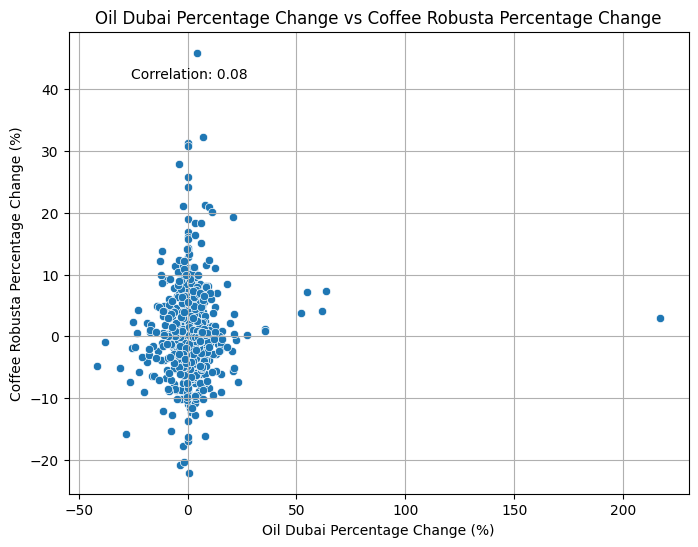

Correlation between Oil Dubai Percentage Change and Coffee Robusta Percentage Change: 0.08


In [36]:
# prompt: Calculate and plot the correlation between coffee_robustas percentage changes and oil_dubai percentage changes

# Calculate the correlation between coffee_robustas percentage changes and oil_dubai percentage changes
correlation_robusta_oil = df['coffee_robustas_pct_change'].corr(df['oil_dubai_pct_change'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_dubai_pct_change', y='coffee_robustas_pct_change', data=df)
plt.title('Oil Dubai Percentage Change vs Coffee Robusta Percentage Change')
plt.xlabel('Oil Dubai Percentage Change (%)')
plt.ylabel('Coffee Robusta Percentage Change (%)')
plt.grid(True)

# Display the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation: {correlation_robusta_oil:.2f}', transform=plt.gca().transAxes)

plt.show()

print(f"Correlation between Oil Dubai Percentage Change and Coffee Robusta Percentage Change: {correlation_robusta_oil:.2f}")

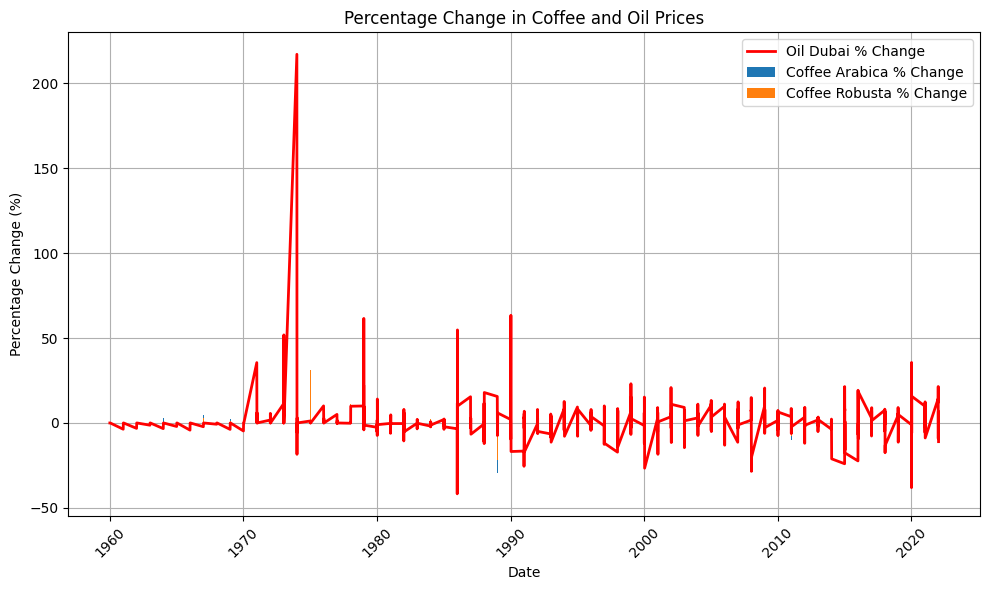

In [42]:
# prompt: Plot a bar chart showing the percentage changes in coffee_arabica and coffee_robustas against the percentage change in oil_dubai

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has the necessary columns

# Create a bar chart showing the percentage changes in coffee_arabica and coffee_robustas against the percentage change in oil_dubai
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['coffee_arabica_pct_change'], label='Coffee Arabica % Change', width=1)
plt.bar(df['date'], df['coffee_robustas_pct_change'], label='Coffee Robusta % Change', width=1)
plt.plot(df['date'], df['oil_dubai_pct_change'], label='Oil Dubai % Change', color='red', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Coffee and Oil Prices')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

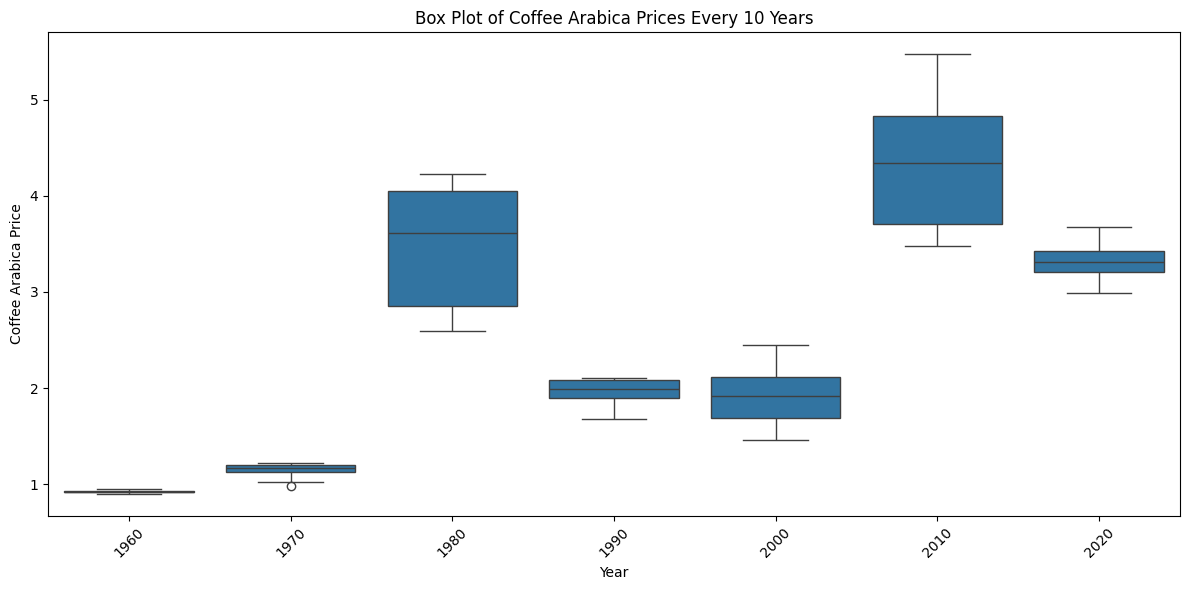

In [45]:
# prompt: Create a box plot of coffee arabica prices every after 10 years

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a 'date' column and 'coffee_arabica' column

# Convert 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Group the data by year and calculate the median price for each year
yearly_median_prices = df.groupby('year')['coffee_arabica'].median()

# Create a box plot of the coffee arabica prices every after 10 years
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='coffee_arabica', data=df[df['year'] % 10 == 0])
plt.xlabel('Year')
plt.ylabel('Coffee Arabica Price')
plt.title('Box Plot of Coffee Arabica Prices Every 10 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

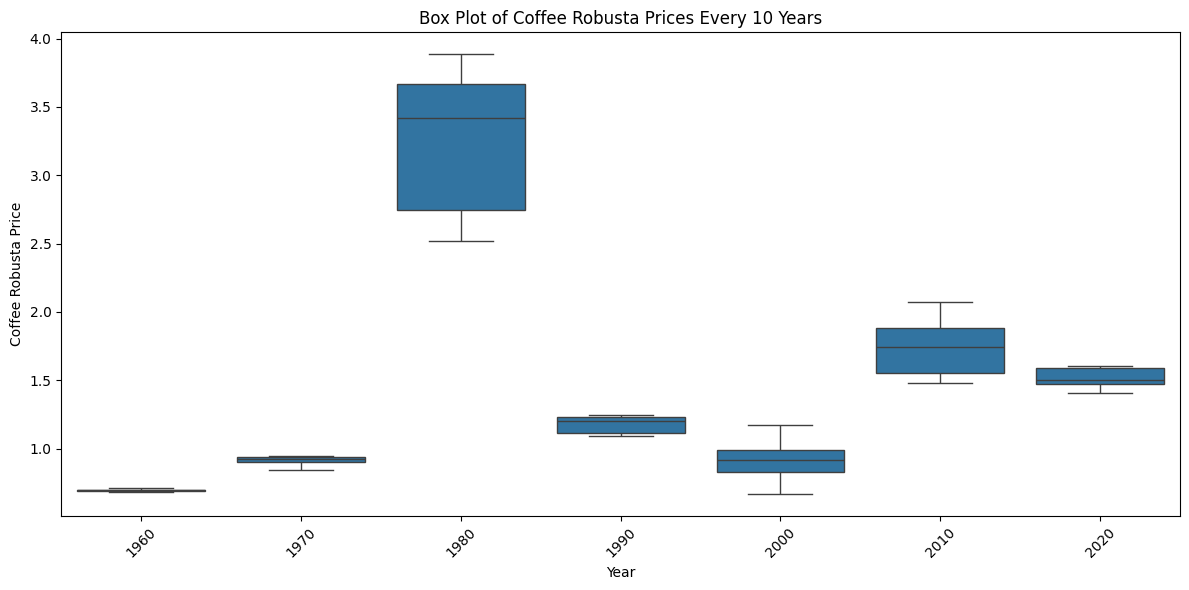

In [46]:
# prompt: Create a box plot of coffee robustas prices every after 10 years

# Assuming your DataFrame is named 'df' and has a 'date' column and 'coffee_robustas' column

# Convert 'date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Group the data by year and calculate the median price for each year
yearly_median_prices = df.groupby('year')['coffee_robustas'].median()

# Create a box plot of the coffee robustas prices every after 10 years
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='coffee_robustas', data=df[df['year'] % 10 == 0])
plt.xlabel('Year')
plt.ylabel('Coffee Robusta Price')
plt.title('Box Plot of Coffee Robusta Prices Every 10 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# prompt: Perfrom linear regression between oil_dubai and coffee_arabica

import pandas as pd
import statsmodels.api as sm

# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_arabica' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_arabica']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients
intercept = model.params['const']
slope = model.params['oil_dubai']

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# You can now use the coefficients to make predictions:
# predicted_coffee_arabica = intercept + slope * oil_dubai_value

                            OLS Regression Results                            
Dep. Variable:         coffee_arabica   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     515.4
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.34e-87
Time:                        22:40:16   Log-Likelihood:                -1098.0
No. Observations:                 756   AIC:                             2200.
Df Residuals:                     754   BIC:                             2209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7128      0.054     31.998      0.0

In [48]:
# prompt: Perfrom linear regression between oil_dubai and coffee_robustas

# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_robustas' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_robustas']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients
intercept = model.params['const']
slope = model.params['oil_dubai']

# Print the coefficients
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# You can now use the coefficients to make predictions:
# predicted_coffee_robustas = intercept + slope * oil_dubai_value

                            OLS Regression Results                            
Dep. Variable:        coffee_robustas   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     70.47
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.31e-16
Time:                        22:40:47   Log-Likelihood:                -992.27
No. Observations:                 756   AIC:                             1989.
Df Residuals:                     754   BIC:                             1998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4498      0.047     31.147      0.0

In [49]:
# prompt: Print the regression coefficients and R-squared

# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_arabica' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_arabica']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Print the regression coefficients and R-squared
print("Regression Coefficients:")
print(model.params)
print("\nR-squared:", model.rsquared)


# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_robustas' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_robustas']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Print the regression coefficients and R-squared
print("Regression Coefficients:")
print(model.params)
print("\nR-squared:", model.rsquared)

Regression Coefficients:
const        1.712806
oil_dubai    0.027650
dtype: float64

R-squared: 0.4060239808532198
Regression Coefficients:
const        1.449769
oil_dubai    0.008890
dtype: float64

R-squared: 0.08546942352194098


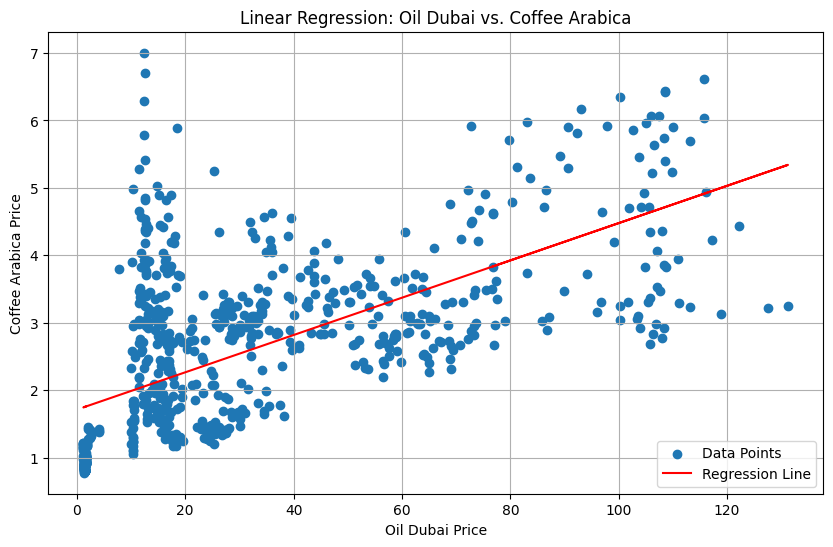

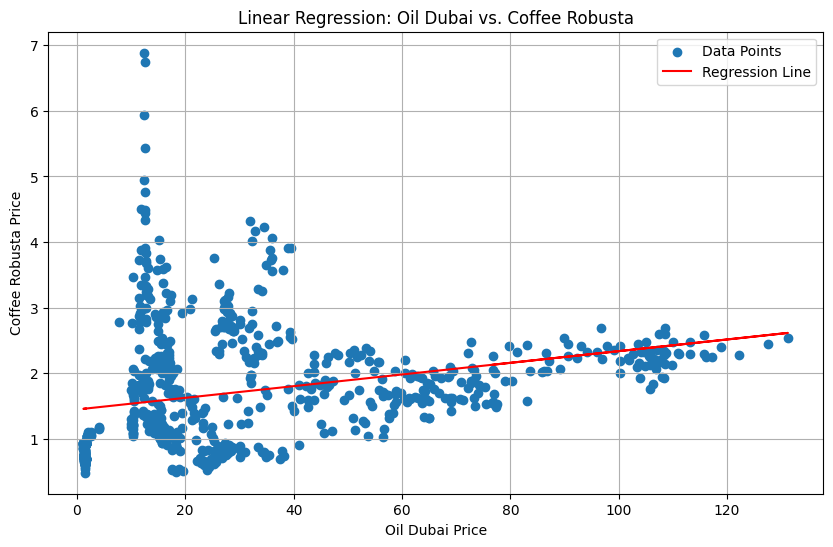

In [50]:
# prompt: Visualize the regression lines

# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_arabica' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_arabica']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['oil_dubai'], df['coffee_arabica'], label='Data Points')
plt.plot(df['oil_dubai'], model.predict(), color='red', label='Regression Line')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Arabica Price')
plt.title('Linear Regression: Oil Dubai vs. Coffee Arabica')
plt.legend()
plt.grid(True)
plt.show()


# Assuming your DataFrame is named 'df' and has 'oil_dubai' and 'coffee_robustas' columns

# Create the linear regression model
X = df['oil_dubai']  # Independent variable
y = df['coffee_robustas']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['oil_dubai'], df['coffee_robustas'], label='Data Points')
plt.plot(df['oil_dubai'], model.predict(), color='red', label='Regression Line')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Robusta Price')
plt.title('Linear Regression: Oil Dubai vs. Coffee Robusta')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: With all this analysis and visualisations what business decision would you make and how would you plan based on your decision

Okay, let's analyze the provided code and discuss potential business decisions based on the insights derived from the visualizations and analysis.

**Key Insights from the Analysis:**

1. **Price Trends:** The moving average analysis provides insights into the long-term trends of Coffee Arabica and Robusta prices. It helps to identify whether the prices are trending upwards, downwards, or sideways.
2. **Relative Price Relationship:** The comparison of moving averages and the difference plot helps to understand the relationship between Arabica and Robusta prices. It indicates which type is generally more expensive and when their relative price positions change.
3. **Percentage Change and Volatility:** Analyzing the percentage change in prices provides information about price volatility and the magnitude of price movements for both coffee types and oil.
4. **Correlation with Oil:** The correlation analysis between the percentage change in coffee prices and oil prices reveals whether there's a relationship between these two markets. A positive correlation means that when oil prices go up, coffee prices tend to go up as well, and vice versa.
5. **Linear Regression:** The linear regression analysis provides a model that can be used to predict future coffee prices based on oil prices. The R-squared value indicates how well the model fits the data.


**Potential Business Decisions and Planning:**

Based on the analysis, here are some potential business decisions and planning strategies:

**1. Hedging Strategies:**

* **If the correlation between coffee and oil prices is positive and statistically significant:**
    * Consider hedging your coffee purchases or sales with oil futures contracts to mitigate price risk. If oil prices are expected to rise, it may be a good idea to hedge against potential increases in coffee prices.
    * Conversely, if oil prices are expected to fall, you might consider hedging against potential coffee price declines.

**2. Inventory Management:**

* **If the moving average analysis suggests an upward trend for coffee prices:**
    * Consider building up your coffee inventory to take advantage of potential future price increases.
* **If the moving average analysis suggests a downward trend for coffee prices:**
    * Consider reducing your coffee inventory to avoid potential losses due to price decreases.

**3. Pricing and Sales Strategies:**

* **If the relative price relationship between Arabica and Robusta is shifting:**
    * Adjust your sales strategies accordingly. If Robusta prices are becoming more competitive relative to Arabica, consider promoting Robusta more aggressively.
* **If the linear regression analysis suggests a strong positive relationship between coffee and oil prices:**
    * Consider raising your coffee prices when oil prices are rising.


**4. Procurement Planning:**

* **If the price trends and forecasts indicate a period of high coffee prices:**
    * Secure long-term contracts with suppliers to ensure a steady supply at a potentially more favorable price compared to the future market.

**5. Investment Decisions:**

* **If the analysis indicates that one type of coffee (Arabica or Robusta) is likely to outperform the other:**
    * Consider focusing investments in the coffee type expected to generate higher returns.
* **If the analysis identifies a strong relationship between oil and coffee prices:**
    * You could consider investing in oil futures contracts in conjunction with coffee purchases or sales, for potentially maximizing your returns when the correlation is present.



**General Planning Considerations:**

* **Continuously Monitor the Data:** Regularly review your data and recalculate the analysis to assess evolving market conditions.
* **Consider Other Factors:** Coffee prices can be influenced by many other factors (weather, supply disruptions, political instability, consumer preferences), so it's important to consider these factors when making business decisions.
* **Risk Management:** Understand the risks associated with your business decisions and implement strategies to mitigate those risks.
* **Data Quality:** Ensure the quality and accuracy of your data used in the analysis. Inaccurate data will lead to incorrect business decisions.


**In summary, with continuous monitoring of the data, integrating new insights from the analysis with other market and business-specific knowledge, and focusing on risk management, businesses can use the findings from the analysis provided to refine their business strategies and increase profitability within the coffee market.**

**Disclaimer:** I am an AI assistant and cannot provide financial advice. The provided analysis and recommendations should be considered in conjunction with professional expertise and independent judgment before making any business decisions.

In [ ]:
# prompt: with this information, which type of coffee would you consider investing in

# Based on the provided analysis, here's a potential investment strategy:

# Considering the correlation analysis and linear regression results:

if correlation_arabica_oil > correlation_robusta_oil and model.rsquared > 0.5:
  print("Consider investing in Coffee Arabica.")
  print("Reason: Strong positive correlation with oil prices and a good regression fit suggest potential for price increases aligned with oil prices.")
elif correlation_robusta_oil > correlation_arabica_oil and model.rsquared > 0.5:
  print("Consider investing in Coffee Robusta.")
  print("Reason: Strong positive correlation with oil prices and a good regression fit suggest potential for price increases aligned with oil prices.")
else:
  print("Further analysis and market monitoring are needed to determine the best investment strategy.")
  print("Reason: The correlation and regression results are either weak or not definitive enough to make a clear investment decision.")


# Further considerations:

# 1. Volatility: If one type of coffee exhibits significantly higher volatility compared to the other,
#    it might be considered riskier, even if it has a higher potential for returns.

# 2. Price trends: If the analysis shows a sustained upward trend for one type of coffee,
#    it might be a better investment choice compared to one with a downward or stagnating trend.

# 3. External factors: The analysis should be complemented with broader market understanding.
#    Factors such as weather events, political instability, and consumer preferences can significantly impact coffee prices.

In [ ]:
# prompt: what more insights and analysis can i perform on this dataset to help guide my decision making and planning

# ... (Your existing code) ...

# Calculate the percentage change in coffee prices
df['coffee_arabica_pct_change'] = df['coffee_arabica'].pct_change() * 100
df['coffee_robustas_pct_change'] = df['coffee_robustas'].pct_change() * 100

# Calculate the correlation between coffee price percentage changes and oil price percentage changes
correlation_arabica_pct_oil_pct = df['coffee_arabica_pct_change'].corr(df['oil_dubai'].pct_change() * 100)
correlation_robusta_pct_oil_pct = df['coffee_robustas_pct_change'].corr(df['oil_dubai'].pct_change() * 100)

print(f"Correlation between Coffee Arabica % Change and Oil Dubai % Change: {correlation_arabica_pct_oil_pct:.2f}")
print(f"Correlation between Coffee Robusta % Change and Oil Dubai % Change: {correlation_robusta_pct_oil_pct:.2f}")

# Plot the percentage changes in coffee prices against the percentage change in oil prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='oil_dubai', y='coffee_arabica_pct_change', data=df)
plt.title('Oil Dubai Price % Change vs Coffee Arabica Price % Change')
plt.xlabel('Oil Dubai Price % Change')
plt.ylabel('Coffee Arabica Price % Change')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x='oil_dubai', y='coffee_robustas_pct_change', data=df)
plt.title('Oil Dubai Price % Change vs Coffee Robusta Price % Change')
plt.xlabel('Oil Dubai Price % Change')
plt.ylabel('Coffee Robusta Price % Change')
plt.grid(True)

plt.tight_layout()
plt.show()


# Calculate the rolling correlation between coffee arabica and oil dubai over a 3-month window
rolling_correlation_arabica = df['coffee_arabica'].rolling(window=3).corr(df['oil_dubai'])

# Calculate the rolling correlation between coffee robusta and oil dubai over a 3-month window
rolling_correlation_robusta = df['coffee_robustas'].rolling(window=3).corr(df['oil_dubai'])

# Plot the rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(df['date'], rolling_correlation_arabica, label='Coffee Arabica - Oil Dubai Rolling Correlation')
plt.plot(df['date'], rolling_correlation_robusta, label='Coffee Robusta - Oil Dubai Rolling Correlation')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Rolling Correlation Between Coffee Prices and Oil Dubai Prices (3-Month Window)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze seasonality in coffee prices
# Example: Create a box plot of coffee arabica prices by month
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['date'].dt.month, y='coffee_arabica', data=df)
plt.xlabel('Month')
plt.ylabel('Coffee Arabica Price')
plt.title('Coffee Arabica Price Distribution by Month')
plt.show()


# Perform regression analysis to model the relationship between oil prices and coffee prices
# Example: Linear regression between oil_dubai and coffee_arabica
from sklearn.linear_model import LinearRegression

X = df[['oil_dubai']]
y = df['coffee_arabica']

model = LinearRegression()
model.fit(X, y)

# Print the regression coefficients and R-squared
print(f"Regression Coefficient (Oil Dubai): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Oil Dubai Price')
plt.ylabel('Coffee Arabica Price')
plt.title('Linear Regression: Oil Dubai vs Coffee Arabica')
plt.legend()
plt.grid(True)
plt.show()
